<a href="https://colab.research.google.com/github/ov29/Research_project/blob/main/e_Label_Only_attack_Aloa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Label-Only Membership
Inference Attack ( Aloa)**

Fixing test attack
- added dataset Bank
- trained nn model on bank
- adjusted attack class and confidence attack on bank

Before the big execution of explainations

In [6]:
import pandas as pd
import os
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv("data/bank/bank_original.csv")

# Unnamed: 0 rappresentano gli indici va rimosso.
df.drop(columns=['Unnamed: 0'], inplace=True)

# Remove duplicates entries
df.drop_duplicates(inplace=True)

# Remove null column rows
print(df.info())
df = df[df['monthly_income'].notnull()]
print(df.info())

# We take the labels
# Altamente sbilanciato
# Lo bilanciamo
print(df['target'].value_counts())
labels = df.pop('target')
# Undersampling of the dataset
undersample = RandomUnderSampler(sampling_strategy="majority")
tr, tr_l = undersample.fit_resample(df, labels.values)
tr = pd.DataFrame(tr)
tr_l = pd.DataFrame(tr_l)
# We split 80-20
train_set, test_set, train_label, test_label = train_test_split(tr, tr_l, stratify=tr_l,
                                                                test_size=0.20, random_state=0)
train_set.to_csv('data/bank/original_train_set.csv', index=False)
test_set.to_csv('data/bank/original_test_set.csv', index=False)
train_label.to_csv('data/bank/original_train_label.csv', index=False)
test_label.to_csv('data/bank/original_test_label.csv', index=False)

shadow = pd.read_csv("data/bank/bank_shadow.csv")
shadow.drop(columns=['Unnamed: 0'], inplace=True)
shadow.drop_duplicates(inplace=True)
print(shadow.info())
shadow = shadow[shadow['nbr_60_89_days_past_due_not_worse'].notnull()]
print(shadow.info())
# Remove Nan values from the columns
print(shadow.columns[shadow.isnull().any()].tolist())
shadow.dropna(inplace=True)
print(shadow.columns[shadow.isnull().any()].tolist())
# See if it's balanced or not.
print(shadow['target'].value_counts())
shadow_l = shadow.pop('target')
undersample = RandomUnderSampler(sampling_strategy="majority")
shadow, shadow_l = undersample.fit_resample(shadow, shadow_l.values)
print(shadow.shape)
shadow = pd.DataFrame(shadow)
shadow_l = pd.DataFrame(shadow_l)
shadow.to_csv("data/bank/noise_shadow_old.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119563 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   revolving                          119563 non-null  float64
 1   age                                119563 non-null  int64  
 2   nbr_30_59_days_past_due_not_worse  119563 non-null  int64  
 3   debt_ratio                         119563 non-null  float64
 4   monthly_income                     96253 non-null   float64
 5   nbr_open_credits_and_loans         119563 non-null  int64  
 6   nbr_90_days_late                   119563 non-null  int64  
 7   nbr_real_estate_loans_or_lines     119563 non-null  int64  
 8   nbr_60_89_days_past_due_not_worse  119563 non-null  int64  
 9   dependents                         116511 non-null  float64
 10  target                             119563 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1

load_dataset

In [7]:
import pandas as pd
import os
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv("data/bank/bank_original.csv")

# Unnamed: 0 rappresentano gli indici va rimosso.
df.drop(columns=['Unnamed: 0'], inplace=True)

# Remove duplicates entries
df.drop_duplicates(inplace=True)

# Remove null column rows
print(df.info())
df = df[df['monthly_income'].notnull()]
print(df.info())

# We take the labels
# Altamente sbilanciato
# Lo bilanciamo
print(df['target'].value_counts())
labels = df.pop('target')
# Undersampling of the dataset
undersample = RandomUnderSampler(sampling_strategy="majority")
tr, tr_l = undersample.fit_resample(df, labels.values)
tr = pd.DataFrame(tr)
tr_l = pd.DataFrame(tr_l)
# We split 80-20
train_set, test_set, train_label, test_label = train_test_split(tr, tr_l, stratify=tr_l,
                                                                test_size=0.20, random_state=0)
train_set.to_csv('data/bank/original_train_set.csv', index=False)
test_set.to_csv('data/bank/original_test_set.csv', index=False)
train_label.to_csv('data/bank/original_train_label.csv', index=False)
test_label.to_csv('data/bank/original_test_label.csv', index=False)

shadow = pd.read_csv("data/bank/bank_shadow.csv")
shadow.drop(columns=['Unnamed: 0'], inplace=True)
shadow.drop_duplicates(inplace=True)
print(shadow.info())
shadow = shadow[shadow['nbr_60_89_days_past_due_not_worse'].notnull()]
print(shadow.info())
# Remove Nan values from the columns
print(shadow.columns[shadow.isnull().any()].tolist())
shadow.dropna(inplace=True)
print(shadow.columns[shadow.isnull().any()].tolist())
# See if it's balanced or not.
print(shadow['target'].value_counts())
shadow_l = shadow.pop('target')
undersample = RandomUnderSampler(sampling_strategy="majority")
shadow, shadow_l = undersample.fit_resample(shadow, shadow_l.values)
print(shadow.shape)
shadow = pd.DataFrame(shadow)
shadow_l = pd.DataFrame(shadow_l)
shadow.to_csv("data/bank/noise_shadow_old.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119563 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   revolving                          119563 non-null  float64
 1   age                                119563 non-null  int64  
 2   nbr_30_59_days_past_due_not_worse  119563 non-null  int64  
 3   debt_ratio                         119563 non-null  float64
 4   monthly_income                     96253 non-null   float64
 5   nbr_open_credits_and_loans         119563 non-null  int64  
 6   nbr_90_days_late                   119563 non-null  int64  
 7   nbr_real_estate_loans_or_lines     119563 non-null  int64  
 8   nbr_60_89_days_past_due_not_worse  119563 non-null  int64  
 9   dependents                         116511 non-null  float64
 10  target                             119563 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1

**Adult**

Fixed attack on Adult dataset, by resplitting the dataset and retraining the Neuaral Network by overfitting harder on a small train.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None  # default='warn'
from imblearn.under_sampling import RandomUnderSampler

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df = pd.read_csv("adult/adult_data.csv", skipinitialspace=True, usecols=columns)

# Duplicated drop.
df = df.drop_duplicates()

# Deleting missing values.
df.drop(df.index[df['workclass'] == '?'], inplace=True)
df.drop(df.index[df['occupation'] == '?'], inplace=True)
df.drop(df.index[df['native-country'] == '?'], inplace=True)

# Binarizzation for the feature class salary for predicting purpose.
df.rename(columns={'salary': 'class'}, inplace=True)  # renaming the salary column to class.
df['class'] = df['class'].apply(lambda x: 0 if x == "<=50K" else 1)
categorical_classes = df.select_dtypes(include=['object']).columns.tolist()

# Hot encoding of all the categorical attributes.
df = pd.get_dummies(df, columns=categorical_classes)
label_dt = df.pop('class')

undersample = RandomUnderSampler(sampling_strategy="majority")
tr, tr_l = undersample.fit_resample(df, label_dt)

train_set, shadow_set, train_label, shadow_label = train_test_split(tr, tr_l, stratify=tr_l,
                                                                    test_size=0.80, random_state=1)

# Saving the shadow set and the original dataset.
shadow_set['class'] = shadow_label.values
train_set['class'] = train_label.values

# Print the dimensions of the training and test sets
print("Training set dimensions:", train_set.shape)
print("Test set dimensions:", test_set.shape)

# This set will be used later to train and evaluate the model.
shadow_set[:train_set.shape[0]].to_csv('adult/adult_shadow.csv', index=False)

train_label = train_set.pop('class')
# Splittig the original dataset train set with the typical holdout percentage 80-20.
train_set, test_set, train_label, test_label = train_test_split(train_set, train_label, stratify=train_label,
                                                                test_size=0.20, random_state=0)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2)
dt_model.fit(train_set, train_label)

# Evaluate the model on the test set
test_prediction = dt_model.predict(test_set)
report = classification_report(test_label, test_prediction)
print("Classification Report on Test Set:\n", report)

Training set dimensions: (3002, 105)
Test set dimensions: (601, 104)
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       301
           1       0.77      0.79      0.78       300

    accuracy                           0.78       601
   macro avg       0.78      0.78      0.78       601
weighted avg       0.78      0.78      0.78       601



In [52]:
import pandas as pd
import pickle
import numpy as np

# Percentage of values to perturb (add noise to)
perc = 5

# Read the shadow dataset from a CSV file
filename = "adult/adult_shadow.csv"
dataset_shadow = pd.read_csv(filename)

# Remove the "class" column as it's typically the target variable
dataset_shadow.pop("class")

# Get the number of columns and rows in the dataset
n_col = dataset_shadow.shape[1]
n_rows = dataset_shadow.shape[0]

# Loop over each column in the dataset
for c in range(n_col):
    # Calculate the number of rows to perturb based on the specified percentage
    percentage = int((perc / float(100)) * n_rows)

    # Randomly choose indices to replace in the column
    index_to_replace = np.random.choice([i for i in range(n_rows)], size=percentage)

    # Generate new random values to replace the selected indices
    new_values = np.random.rand(percentage)

    # Replace the values in the dataset with the new random values at the selected indices
    for ind, val in zip(index_to_replace, new_values):
        dataset_shadow.iloc[ind, c] = round(val, 2)

# Save the perturbed dataset to a new CSV file
filename = "adult/noise_shadow.csv"
dataset_shadow.to_csv(filename, index=False)

# The following code is commented out; it would save the DataFrame as a pickled object
# This is optional and might be used if you want to preserve the DataFrame with noise for later use
"""
f = open(filename, 'wb')
pickle.dump(dataset_shadow, f)
f.close()
"""


"\nf = open(filename, 'wb')\npickle.dump(dataset_shadow, f)\nf.close()\n"

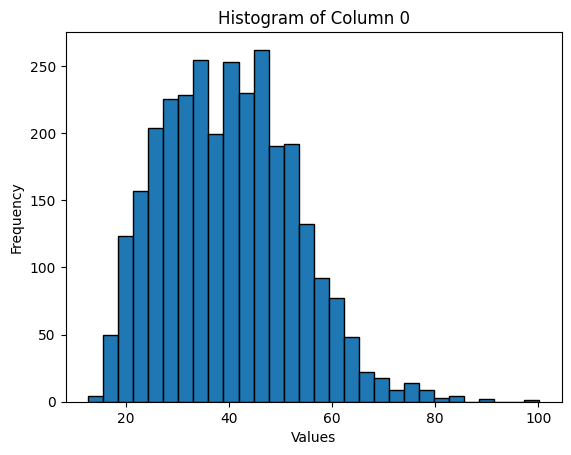

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,37.00,152307.0,10.00,0.0,0.0,40.0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0
1,72.00,33404.0,6.00,0.0,0.0,20.0,0.0,0.00,1.0,0.0,...,0.0,0.0,0.00,0.17,0.00,0.0,0.0,1.0,0.0,0.0
2,25.00,397962.0,9.00,0.0,0.0,47.2,0.0,0.00,1.0,0.0,...,0.0,0.0,0.12,0.00,0.16,0.0,0.0,1.0,0.0,0.0
3,46.00,394860.0,13.00,0.0,0.0,38.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0
4,35.34,161745.0,15.86,0.0,1980.0,60.0,0.0,0.12,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['fnlwgt'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['education-num'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['fnlwgt'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['education-num'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['index', 'age'], ['age', 'fnlwgt'], ['fnlwgt', 'education-num'], ['education-num', 'capital-loss']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'age', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['index', 'fnlwgt', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'education-num', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['index', 'hours-per-week', None], **{})
chart

In [54]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

perc = 9
percentage_deviation = (0.1, 0.25)
filename = "adult/adult_shadow.csv"
dataset_shadow = pd.read_csv(filename)

if 'Unnamed: 0' in dataset_shadow.columns:
    dataset_shadow.pop('Unnamed: 0')

dataset_shadow.pop("class")

n_col = dataset_shadow.shape[1]
n_rows = dataset_shadow.shape[0]

# Add noise to the dataset
for c in range(n_col):
    percentage = int((perc / float(100)) * n_rows)
    index_to_replace = np.random.choice([i for i in range(n_rows)], size=percentage)

    for ind in index_to_replace:
        sample = np.random.uniform(low=percentage_deviation[0], high=percentage_deviation[1], size=(1,))[0]
        sample = round(sample, 2)

        if dataset_shadow.iat[ind, c] == 0:
            dataset_shadow.iloc[ind, c] = sample
        else:
            if np.random.randint(2, size=1)[0] == 1:
                sample *= -1
            dataset_shadow.iloc[ind, c] += round(dataset_shadow.iat[ind, c] * sample, 3)

# Plot a histogram of one column after noise is added
column_to_plot = 0  # Change this to the index of the column you want to plot
plt.hist(dataset_shadow.iloc[:, column_to_plot], bins=30, edgecolor='black')
plt.title(f'Histogram of Column {column_to_plot}')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Display the modified DataFrame as a table
display(dataset_shadow.head())